In [1]:
# Importing some necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
# Reading the data using pandas
house = pd.read_excel(r"DS - Assignment Part 1 data set.xlsx",header=0)
house.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
# The data type of each coulmn
house.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [4]:
# Finding the missing values but no missing values
house.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
# Finding any unique character in each columns
for i in house.columns:
    print({i:house[i].unique()})

{'Transaction date': array([2012.9166667, 2013.5833333, 2013.5      , 2012.8333333,
       2012.6666667, 2013.4166667, 2013.0833333, 2013.3333333,
       2013.25     , 2012.75     , 2013.       , 2013.1666667])}
{'House Age': array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 3

In [6]:
# Finding the number of rows and columns in the data
house.shape

(414, 9)

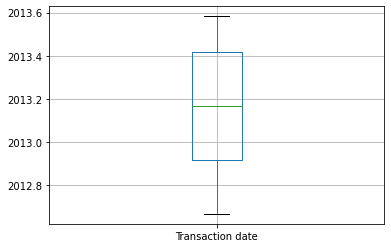

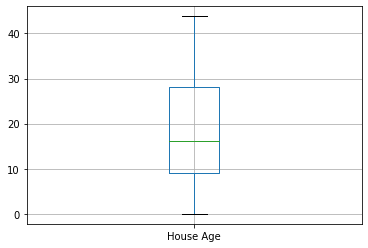

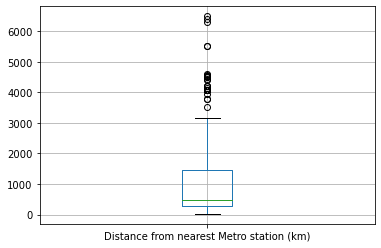

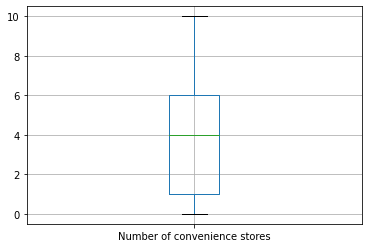

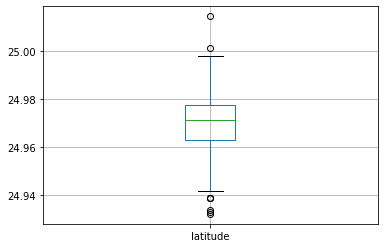

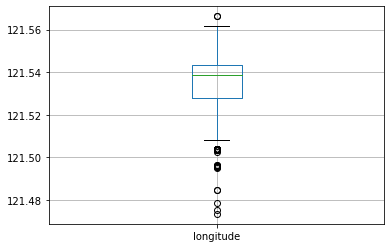

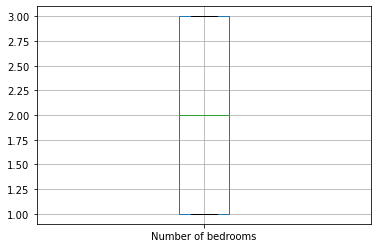

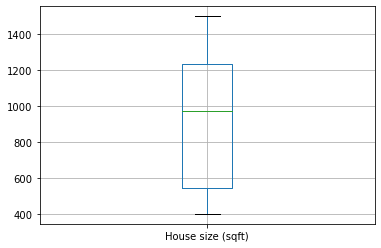

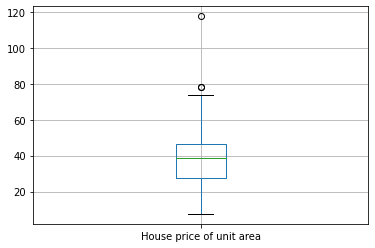

In [7]:
#Assumption 1: There should be no outliers in the data
#Check using boxplot
for i in house.columns:
    house.boxplot(column = i)
    plt.show()

There are some outliers in some columns but the columns are very important and the data is very limited so making any treatment or droping the data point would manupulate the data so I'm keeping as it is. 

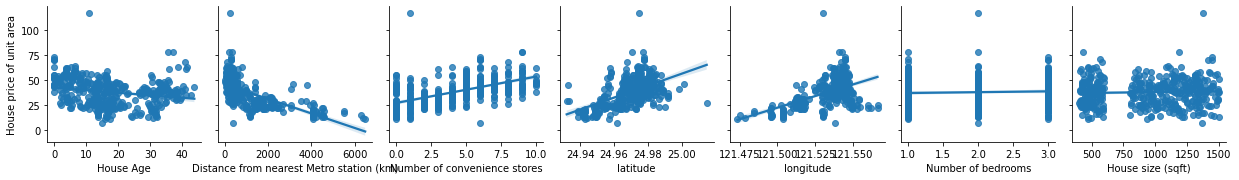

In [8]:
#Assumption 2:Assumption of linearity:Every independent variable should have a 
#linear relationship with dependent variable
sns.pairplot(house,x_vars=["House Age","Distance from nearest Metro station (km)","Number of convenience stores",
                          "latitude","longitude","Number of bedrooms","House size (sqft)"],
            y_vars="House price of unit area",kind="reg")

In this graph its shows that not every variable have a linear relationship with dependent variable but all the variable are important so keeping the data as it is 

In [9]:
# Diving the data by creating X and Y 
# X has all the independent variable from the data
# Y has the dependent variable from the data
X = house[["Transaction date","House Age","Distance from nearest Metro station (km)","Number of convenience stores",
           "latitude","longitude","Number of bedrooms","House size (sqft)"]]
Y = house[["House price of unit area"]]
print(X.shape)
print(Y.shape)

(414, 8)
(414, 1)


<AxesSubplot:ylabel='Density'>

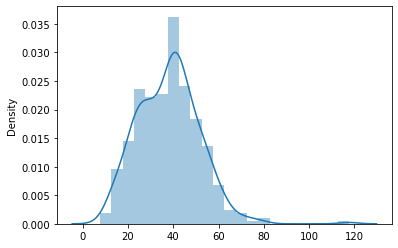

In [10]:
#Assumption 3:Assumption of Normality: The dependent vafriable should follow on approximate normal distribution
sns.distplot(Y)

                                          Transaction date  House Age  \
Transaction date                                  1.000000   0.017542   
House Age                                         0.017542   1.000000   
Distance from nearest Metro station (km)          0.060880   0.025622   
Number of convenience stores                      0.009544   0.049593   
latitude                                          0.035016   0.054420   
longitude                                        -0.041065  -0.048520   
Number of bedrooms                                0.061985  -0.008756   
House size (sqft)                                 0.068405  -0.060361   

                                          Distance from nearest Metro station (km)  \
Transaction date                                                          0.060880   
House Age                                                                 0.025622   
Distance from nearest Metro station (km)                                  1.000000  

<AxesSubplot:>

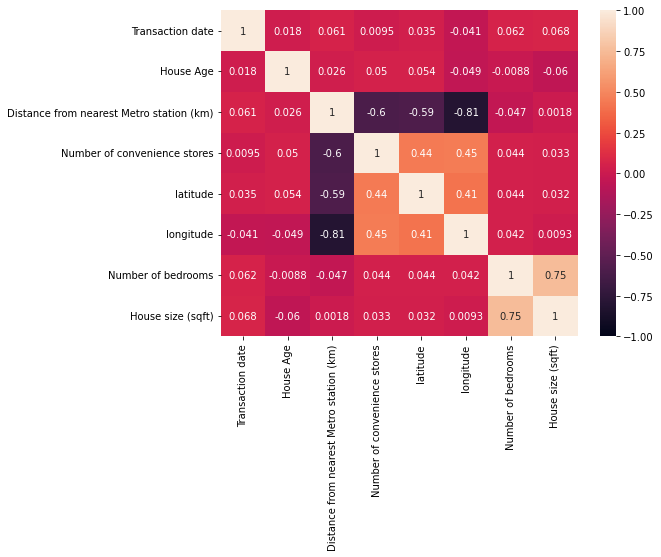

In [11]:
#Assumption 4:Assumption of multicollinearity: There should be no multicollinearity between the independent variables
import numpy as np
corr_df = X.corr(method="pearson")
print(corr_df)
plt.figure(figsize=(8,6))
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

There is multicollinearity between some the independent variables but the variables are important so keeping the data as it is

In [12]:
# Used VIF to see amount of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,Transaction date,42641620.46
1,House Age,3.50
2,Distance from nearest Metro station (km),4.29
3,Number of convenience stores,4.76
4,latitude,6184837.05
5,longitude,42120560.60
6,Number of bedrooms,16.08
7,House size (sqft),19.03


In [13]:
# Scaling the data using scaler
# This is done to bring all the variable to follow a uniform range of values & to make the data unit less
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)

[[-0.82472165  1.25562833 -0.79249504 ...  0.44876222 -1.20789893
  -1.0229196 ]
 [-0.82472165  0.15708622 -0.61661163 ...  0.40113894  0.01476649
   0.88532059]
 [ 1.54224386 -0.38779067 -0.41401527 ...  0.68818339  1.23743191
   0.36880445]
 ...
 [ 0.35876111  0.09556786 -0.54967846 ...  0.42397202 -1.20789893
  -1.22952606]
 [-0.52885105 -0.84478419 -0.77668389 ...  0.4768143  -1.20789893
  -0.95978985]
 [ 1.24637326 -0.98539758 -0.78807071 ...  0.63534112  0.01476649
   0.47497721]]


In [14]:
#Split the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape) 

(331, 8)
(83, 8)
(331, 1)
(83, 1)


In [16]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
#train the model 
lm.fit(X_train,Y_train)
#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

[37.94447914]
[[ 1.50147935 -3.03431806 -6.0596225   3.16704291  2.80307778 -0.48952474
  -0.13122324  0.68103089]]


In [17]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[[47.98193109]
 [41.58475049]
 [44.74158856]
 [39.56897075]
 [28.25053404]
 [45.95143148]
 [44.0919186 ]
 [45.58565259]
 [23.19962394]
 [53.99632906]
 [33.3527738 ]
 [35.91421845]
 [37.12757148]
 [23.52613996]
 [34.59537373]
 [34.3241122 ]
 [43.07096884]
 [45.78272464]
 [29.54129243]
 [44.48001626]
 [ 0.09632641]
 [35.26265041]
 [48.20531164]
 [44.59399262]
 [12.25116873]
 [39.17451474]
 [13.30012487]
 [42.98283261]
 [35.16554573]
 [37.09536034]
 [13.38847511]
 [40.49107102]
 [34.57686166]
 [27.81469396]
 [45.7762212 ]
 [31.72811004]
 [49.9903972 ]
 [13.71693019]
 [49.20278582]
 [39.47867244]
 [39.01012474]
 [40.52337469]
 [46.45281893]
 [37.10791124]
 [39.64462448]
 [46.11604499]
 [43.60828356]
 [20.12292684]
 [48.10574885]
 [45.52201989]
 [47.49419588]
 [48.17097011]
 [42.93911788]
 [41.97345051]
 [35.44435403]
 [15.30768334]
 [36.59219716]
 [35.78084157]
 [29.13738539]
 [46.28620579]
 [33.79556845]
 [32.26060737]
 [15.69481745]
 [ 9.76979651]
 [10.10872277]
 [35.08090529]
 [29.35314

In [18]:
# Evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6687873935940528
RMSE: 7.454135914547555
Adj R-square: 0.6622449223564044


Linear Regression is giving 66.22% of Adj R-square.

The model is not giving a good result. 

Linear Regression:

1) The assumption of linearity between independent and dependent variables.

2) It gets affected due to outliers.

3) It is prone to multicollinearity.

In [19]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,Y_train)
print(lm.intercept_)
print(lm.coef_)

[37.94473041]
[[ 1.49442673 -3.02502903 -5.99441794  3.17183193  2.80978161 -0.44194428
  -0.1240942   0.67414832]]


In [20]:
#predict using the model
Y_pred=lm.predict(X_test)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6691735616522323
RMSE: 7.449789176732833
Adj R-square: 0.6626387184256097


Ridge is giving 66.26% Adj R-square. 

The model is giving almost similar results to Linear Regression. 

Ridge is similar to Linear Regression.

But it identifies the insignificant variables and reduces their coefficient values such that the overall impact of these variables on the model is reduced.

In [22]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)
print(lm.intercept_)
print(lm.coef_)

[38.0846193]
[ 0.46808999 -2.01411055 -5.17067538  2.6500132   2.33504932  0.
  0.          0.        ]


In [23]:
#predict using the model
Y_pred=lm.predict(X_test)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6673838839446087
RMSE: 7.469912626849806
Adj R-square: 0.660813689059564


Lasso is giving 66.08% Adj R-square.

This model is also giving similar results to Linear Regression.

Lasso is also similar to Linear Regression.

But it identifies the insignificant variables and forces their coefficients values to be zero, such that the overall impact of these variables on the model is eliminated.

In [25]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",  
                  eta0=0.01,  
                  shuffle=True, 
                  random_state=42, 
                  max_iter=1000,
                  early_stopping=True, 
                  n_iter_no_change=5) 
lm.fit(X_train,Y_train)
print (lm.intercept_)
print (lm.coef_)

[38.68285142]
[ 1.55930081 -3.04247571 -6.29905212  2.69708444  3.05134401 -0.61734006
  0.47005707  1.18480757]


In [26]:
Y_pred_new = lm.predict(X_test)
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6326461175367928
RMSE: 7.850298941476655
Adj R-square: 0.6253897445498653


SGDRegressor is giving 62.54% Adj R-square.

This model is performing low as compared to Linear Regression.

SGDRegressor:

1) Due to frequent updates, the steps taken towards the minima are very noisy. This can often lead the gradient descent into other directions.

2) Frequent updates are computationally expensive due to using all resources for processing one training sample at a time.

3) Also, due to noisy steps, it may take longer to achieve convergence to the minima of the loss function.

In [27]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(X_train))),metric="manhattan")
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[('House price of unit area', array([47.72222222]))]


In [28]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7268817302757121
RMSE: 6.768918019355766
Adj R-square: 0.7214868014910348


In [29]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,61):
    model_KNN = KNeighborsRegressor(n_neighbors=K,metric="manhattan")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("R-square is", r2_score(Y_test,Y_pred), "for K-Value:",K)

R-square is 0.6425955913284114 for K-Value: 1
R-square is 0.6224193622466127 for K-Value: 2
R-square is 0.7417256907941698 for K-Value: 3
R-square is 0.7406587275938653 for K-Value: 4
R-square is 0.7567172869758029 for K-Value: 5
R-square is 0.757597978459542 for K-Value: 6
R-square is 0.7553484144721127 for K-Value: 7
R-square is 0.7568646254803422 for K-Value: 8
R-square is 0.7541956871879697 for K-Value: 9
R-square is 0.7494629869555415 for K-Value: 10
R-square is 0.7553629207915196 for K-Value: 11
R-square is 0.7459226531066404 for K-Value: 12
R-square is 0.7403589901787965 for K-Value: 13
R-square is 0.7444873278889672 for K-Value: 14
R-square is 0.7380696495433994 for K-Value: 15
R-square is 0.7267402683167774 for K-Value: 16
R-square is 0.7271158177499955 for K-Value: 17
R-square is 0.7268817302757121 for K-Value: 18
R-square is 0.723786770175898 for K-Value: 19
R-square is 0.7183244855043651 for K-Value: 20
R-square is 0.7115919214249642 for K-Value: 21
R-square is 0.7101934018

In [30]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=6,metric="manhattan")
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[('House price of unit area', array([46.75]))]


In [31]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.757597978459542
RMSE: 6.3769350949197605
Adj R-square: 0.7528097903797305


KNeighborsRegressor is giving 75.28% Adj R-square.

This model is giving good results as compared to Linear Regression.

KNeighborsRegressor:

1) It is a lazy algorithm because it will simply load the data into a memory table.

2) It basically stores all of the training and can be computationally expensive.

In [32]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
print(Y_pred)

[46.5517574  40.04516188 41.12638634 36.49664363 28.65930878 39.87276728
 42.53890208 43.19743919 26.31293322 46.88077412 28.92253561 28.75966643
 35.74296721 26.10619418 36.15224264 28.78109487 41.06445382 42.68691716
 26.57341458 44.18356846 28.60812306 27.76172488 48.29565029 40.34139104
 23.6130653  36.42209274 21.68744745 40.35647821 35.72751001 37.889962
 21.78870502 34.0571937  36.19380092 24.38710415 43.97961375 32.99963303
 44.56961509 23.38981048 41.82989506 39.58767484 36.96634645 39.48476943
 41.27040797 36.41343007 39.47148094 44.31042803 44.48914329 28.12651321
 44.50420095 41.42460269 42.71235561 44.26081164 40.07908206 41.34697991
 34.91611155 22.82865314 35.12907958 36.02275623 25.78586313 46.13556449
 27.60382867 30.80850285 21.16104406 24.30238293 30.06758886 28.72284856
 28.7400737  42.89123303 34.2924095  26.59193849 44.44443972 36.54449774
 41.24345892 44.09600201 36.10279387 35.37519963 36.4065677  36.45295175
 38.91614977 32.63473078 39.45284083 40.71940828 29.2

In [33]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6106089672378303
RMSE: 8.082335069437406
Adj R-square: 0.6029172925166022


In [34]:
from sklearn import svm

svc_model = svm.SVR(kernel="rbf")

parameter_space = {
    'kernel' : ["linear","rbf","poly","sigmoid"],
    "gamma" : [0.1,0.01,0.001],
    "C" : [1,5,8,10,20]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5)

In [35]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 5, 8, 10, 20], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [36]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}


In [37]:
from sklearn.svm import SVR
reg = SVR(kernel="rbf",gamma=0.1,C=20)
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
print(Y_pred)

[52.06600501 37.27385357 51.81233239 42.58751582 25.05743227 38.37861582
 43.08251804 46.11538343 22.35275429 58.33159124 27.34153405 28.87070564
 34.73799427 19.54687264 36.97259486 26.12111015 42.62393187 47.31411654
 23.96813827 40.30370575 15.61130787 24.63284815 53.39822636 45.44934339
 15.15051931 42.47493891 13.54149545 48.10265767 38.12749836 40.80706419
 16.62806782 32.9921157  38.27685787 20.09560933 45.21032041 37.69170751
 48.73705146 21.09363925 43.81810384 44.83190085 39.57558785 35.47381326
 41.92010299 37.92278076 38.17640865 45.77438454 43.03132324 25.15879469
 51.45127966 46.6641543  50.3893357  51.09000517 38.34429607 40.90640341
 35.13119284 18.56859535 34.59065891 37.69818578 23.46603791 47.83179433
 27.0205999  29.11714682 15.28265847 12.60476735 24.02211634 27.42081332
 27.71111    46.179455   36.79652176 24.3072892  43.42121011 37.8963609
 46.62240958 45.33612314 38.54974837 39.54921943 41.63999877 36.42204148
 35.60022876 33.04922012 38.65885602 42.39422425 27.

In [38]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7524187517197167
RMSE: 6.4447006881239135
Adj R-square: 0.7475282579265259


SVR is giving 74.75% Adj R-square.

This model is giving good results.

SVR:

1) Not suitable for noisy data.

2) Not suitable for the high number of observations.

3) Suitable for clearly separable data.

In [39]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree = DecisionTreeRegressor(criterion="mse",random_state=42)


model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

In [40]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5993086439759188
RMSE: 8.198773049552738
Adj R-square: 0.591393752992727


DecisionTreeRegressor is giving 59.14% Adj R-square.

This model is not performing well.

DecisionTreeRegressor:

1) It has a problem of overfitting.

2) This algorithm cares about only the current split and not about future splits.

3) Not fit for continuous variables.

In [41]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest = RandomForestRegressor(n_estimators=1000,
                                           random_state=42)

model_RandomForest.fit(X_train,Y_train)

Y_pred = model_RandomForest.predict(X_test)

In [42]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8075076154570932
RMSE: 5.68264667677058
Adj R-square: 0.8037052967500727


RandomForestRegressor is giving 80.37% Adj R-square.

This model is performing really well.

RandomForestRegressor:

1) It creates a large number of Trees which can make the algorithm slow and ineffective for real-time prediction.

2) In most real-world applications, the random forest algorithm is fast enough but there can certainly be situations where run-time performance is important and other approaches would be preferred.

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

model_GradientBoosting=GradientBoostingRegressor(n_estimators=32,random_state=42)

model_GradientBoosting.fit(X_train,Y_train)
Y_pred=model_GradientBoosting.predict(X_test)

In [44]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8015809317520564
RMSE: 5.769465503599186
Adj R-square: 0.7976615427496279


GradientBoostingRegressor is giving 79.77% Adj R-square.

This model is also giving good results. 

GradientBoostingRegressor:
1) It can be computationally expensive and take a long time to train, especially on CPUs.

2) Hard to interpret the final models.

In [45]:
from xgboost import XGBRegressor

model_GradientBoosting = XGBRegressor(n_estimators=100,random_state=42)

model_GradientBoosting.fit(X_train,Y_train)

Y_pred = model_GradientBoosting.predict(X_test)

In [46]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8000713497009027
RMSE: 5.791371106780751
Adj R-square: 0.79612214179376


XGBRegressor is giving 79.61% Adj R-square.

This model is also performing well.

XGBRegressor:

1) It does not perform well on unstructured data.

2) It is very sensitive toward outliers.

3) It is hardly scalable because the estimators base their correctness on previous predictors, hence the procedure involves a lot of struggle to streamline.

In [47]:
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoost=AdaBoostRegressor(base_estimator=
                                  DecisionTreeRegressor(random_state=42),
                                  n_estimators=101,
                                  random_state=42)

model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [48]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7850188623854379
RMSE: 6.005429270492789
Adj R-square: 0.7807723213955207


AdaBoostRegressor is giving 78.08% Adj R-square.

This model is performing well.

AdaBoostRegressor:

1) It requires a quality dataset.

2) Not suitable for noisy data.

3) It is very sensitive toward outliers.

In [49]:
from sklearn.ensemble import ExtraTreesRegressor

model_EXT = ExtraTreesRegressor(n_estimators=1200,
                                           random_state=42,bootstrap=True)

model_EXT.fit(X_train,Y_train)

Y_pred = model_EXT.predict(X_test)

In [50]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8212687705450807
RMSE: 5.475756147889292
Adj R-square: 0.817738277123749


ExtraTreesRegressor is giving 81.77% Adj R-square.

This model is giving the best result.

ExtraTreesRegressor:

1) It is the same as Random Forest but Extra Trees uses the whole sample and Random Forest uses a subsample.

2) In terms of computational cost, and therefore execution time, the Extra Trees algorithm is faster than Random Forest. This algorithm saves time because the whole procedure is the same, but it randomly chooses the split point and does not calculate the optimal one.

Adjusted R-Squared of all the models:

Linear Regression - 66.22%

Ridge - 66.26%

Lasso - 66.08%

SGDRegressor - 62.54%

KNeighborsRegressor - 75.28%

SVR - 74.75%

DecisionTreeRegressor - 59.14%

RandomForestRegressor - 80.37%

GradientBoostingRegressor - 79.77%

XGBRegressor - 79.61%

AdaBoostRegressor - 78.08%

ExtraTreesRegressor - 81.77%

I would prefer ExtraTreesRegressor as the final model because it is giving the best result as compared to other models and with computational cost, the execution time will be faster.

In [51]:
print(Y_pred)

[49.24866667 38.68       51.224      36.15633333 26.72733333 42.78808333
 49.10916667 51.88575    16.07491667 59.01816667 25.5605     32.09091667
 30.36441667 15.56175    36.39775    26.41475    41.97491667 53.16358333
 25.52983333 39.24591667 16.52425    24.64775    51.01841667 45.33658333
 14.86525    37.19758333 16.13466667 48.28825    45.48108333 37.5255
 18.767      26.73708333 37.44808333 25.67966667 47.86008333 38.37983333
 54.94208333 16.576      45.0805     46.72583333 43.90475    40.26033333
 46.60058333 37.65525    38.98925    48.91375    38.7225     23.70433333
 49.46716667 46.7625     48.84116667 54.01       41.04558333 38.90108333
 37.53983333 16.93508333 36.18558333 36.59275    25.84075    50.22533333
 27.93241667 27.08125    16.365      14.87241667 20.04858333 25.12008333
 27.65216667 40.33891667 36.16875    26.94875    44.68675    46.9715
 54.62983333 49.41616667 36.41125    37.28958333 41.15966667 39.773
 38.90516667 30.16566667 39.06375    47.99408333 26.5535    ]
